### EDA and Cluster on Electric Vehicles Dataset

In [73]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

### Check missing values

In [77]:
s = df.isna().sum()
s

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [78]:
s[s>0]

County                    3
City                      3
Postal Code               3
Legislative District    341
Vehicle Location          7
Electric Utility          3
2020 Census Tract         3
dtype: int64

### EDA

### Top 10 state with largest EV populations

In [79]:
top_ev = df['State'].value_counts(ascending=False).head(10)

In [80]:
top_ev

State
WA    150141
CA        92
VA        35
MD        33
TX        20
NC        13
IL        12
AZ        11
CO        11
FL         9
Name: count, dtype: int64

observation : This data mostly in WA, so let see top ten city in WA

In [81]:
WA_city = df[df['State']=='WA']

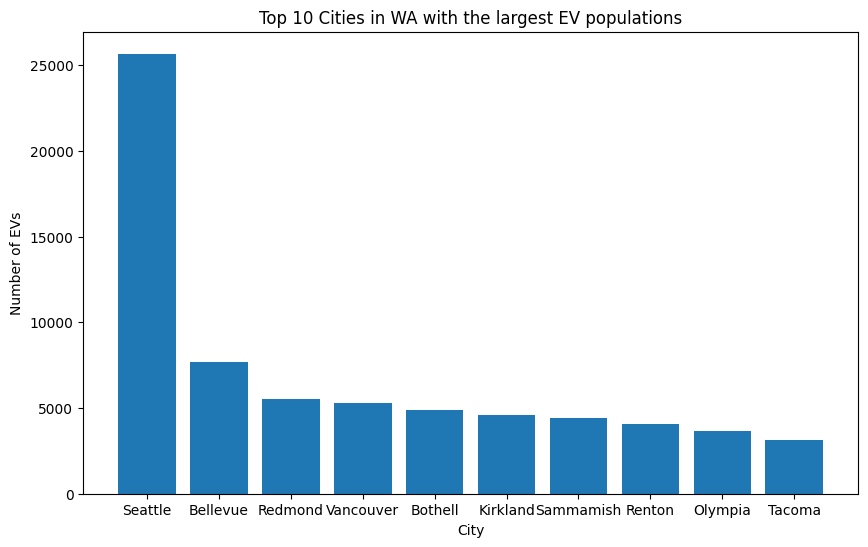

In [82]:
city_counts = WA_city['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(city_counts.index,city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.title('Top 10 Cities in WA with the largest EV populations')
plt.show()

### Counties with the highest EV adoption rates

In [83]:
df['County'].value_counts()

County
King          79075
Snohomish     17307
Pierce        11542
Clark          8855
Thurston       5403
              ...  
Harford           1
Rockingham        1
Gwinnett          1
Onslow            1
Suffolk           1
Name: count, Length: 183, dtype: int64

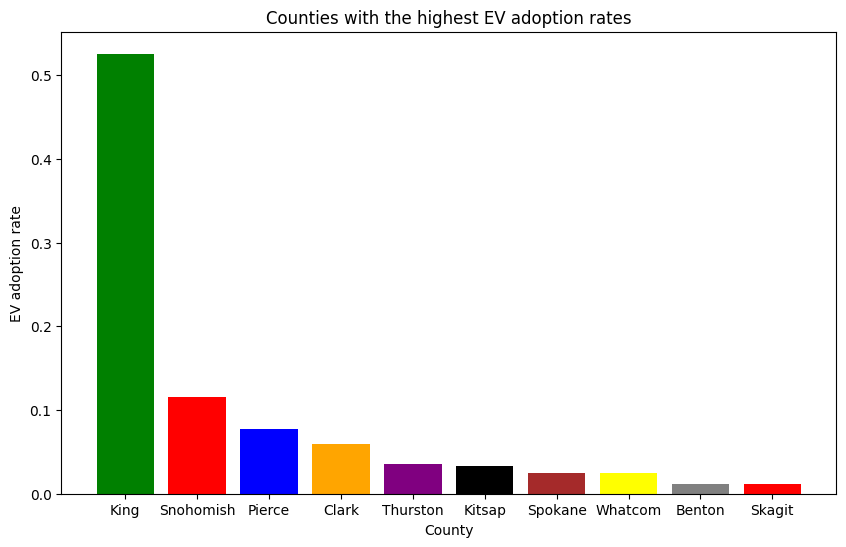

In [84]:
county_counts = df['County'].value_counts(normalize=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(county_counts.index, county_counts.values,color=['green','red','blue','orange','purple','black','brown','yellow','grey','red'])
plt.xlabel('County')
plt.ylabel('EV adoption rate')
plt.title('Counties with the highest EV adoption rates')
plt.show()

### Trend in EV adoption over time

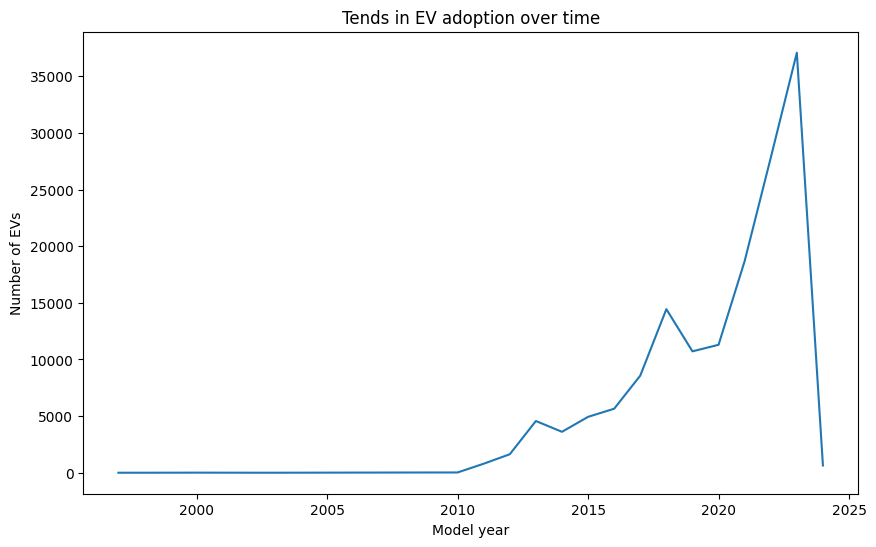

In [91]:
model_year_counts = df.groupby(by=['Model Year'])['VIN (1-10)'].count()
plt.figure(figsize=(10,6))
plt.plot(model_year_counts.index, model_year_counts.values)
plt.xlabel('Model year')
plt.ylabel('Number of EVs')
plt.title('Tends in EV adoption over time')
plt.show()

### EV models most popular in the US

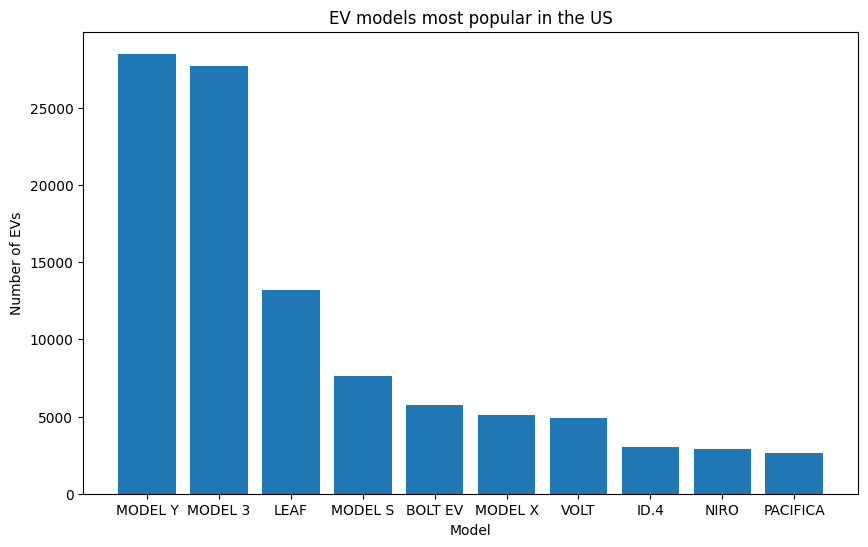

In [92]:
model_counts = df['Model'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(model_counts.index, model_counts.values)
plt.xlabel('Model')
plt.ylabel('Number of EVs')
plt.title('EV models most popular in the US')
plt.show()

### The Develop of EV type over the year

In [94]:
dev_type = df.groupby(by=['Electric Vehicle Type','Model Year'])['VIN (1-10)'].count()
dev_type = dev_type.reset_index()
dev_type.head()

,Electric Vehicle Type,Model Year,VIN (1-10)
0,Battery Electric Vehicle (BEV),1997,1
1,Battery Electric Vehicle (BEV),1998,1
2,Battery Electric Vehicle (BEV),1999,4
3,Battery Electric Vehicle (BEV),2000,8
4,Battery Electric Vehicle (BEV),2002,2


In [95]:
dev_type_2024 = dev_type[dev_type['Model Year']<2024]

In [96]:
dev_type_2024

,Electric Vehicle Type,Model Year,VIN (1-10)
0,Battery Electric Vehicle (BEV),1997,1
1,Battery Electric Vehicle (BEV),1998,1
2,Battery Electric Vehicle (BEV),1999,4
3,Battery Electric Vehicle (BEV),2000,8
4,Battery Electric Vehicle (BEV),2002,2
5,Battery Electric Vehicle (BEV),2003,1
6,Battery Electric Vehicle (BEV),2008,19
7,Battery Electric Vehicle (BEV),2010,21
8,Battery Electric Vehicle (BEV),2011,718
9,Battery Electric Vehicle (BEV),2012,776


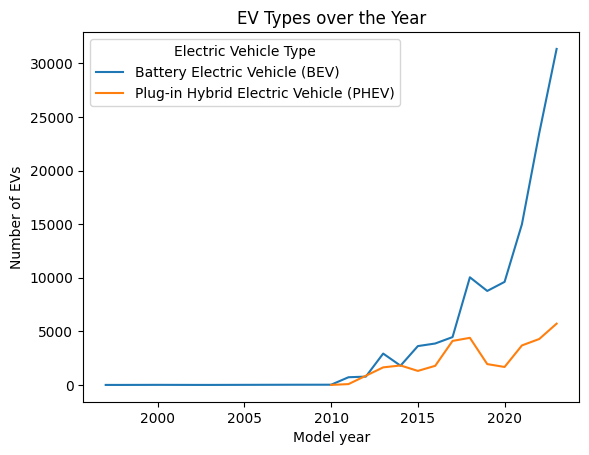

In [97]:
sns.lineplot(dev_type_2024, x='Model Year', y='VIN (1-10)',hue='Electric Vehicle Type')
plt.xlabel('Model year')
plt.ylabel('Number of EVs')
plt.title('EV Types over the Year')
plt.show()